In [1]:
import json
import os
import matplotlib.pyplot as plt

In [2]:
def plot_metrics_boxplots(json_path, bucket_ranges, save_dir, file_name, y_limits):
    import json
    import os
    import matplotlib.pyplot as plt
    
    # Load the JSON data
    with open(json_path, "r") as file:
        data = json.load(file)

    # Prepare the metrics dictionary using the keys from bucket_ranges
    metric_names = list(bucket_ranges.keys())
    metrics = {metric: [] for metric in metric_names}
    bucket_labels = {metric: [] for metric in metric_names}

    # Extract the metrics from the data for each specified bucket range
    for metric, ranges in bucket_ranges.items():
        for bucket_num in ranges:
            bucket_key = f"{bucket_num}_buckets"
            if bucket_key in data:
                metrics[metric].append([result[metric] for result in data[bucket_key]])
                bucket_labels[metric].append(bucket_num)

    # Plotting settings
    boxprops = dict(linestyle='-', linewidth=1.5, color='black', facecolor='lightgrey')
    whiskerprops = dict(linestyle='--', linewidth=1.5, color='black')
    capprops = dict(linestyle='-', linewidth=1.5, color='black')
    medianprops = dict(linestyle='-', linewidth=2, color='black')
    flierprops = dict(marker='o', markerfacecolor='grey', markersize=5, linestyle='none')
    
    # Determine the layout based on the number of metrics
    n_metrics = len(metric_names)
    nrows = n_metrics // 2 + n_metrics % 2
    fig, axes = plt.subplots(nrows, 2, figsize=(12, 6 * nrows))
    axes = axes.flatten()  # Flatten the axes array for easier iteration

    # Generate the plots based on the ordered metrics in bucket_ranges
    for i, metric in enumerate(metric_names):
        ax = axes[i]
        ax.boxplot(metrics[metric], notch=False, patch_artist=True,
                   boxprops=boxprops, whiskerprops=whiskerprops,
                   capprops=capprops, medianprops=medianprops,
                   flierprops=flierprops, showfliers=True)
        ax.set_title(f'{metric}', fontsize=14)
        ax.set_ylabel('Score', fontsize=12)
        ax.set_xlabel('Bucket', fontsize=12)
        ax.set_xticks(range(1, len(metrics[metric])+1))
        ax.set_xticklabels(bucket_labels[metric], fontsize=10)
        if metric in y_limits:
            ax.set_ylim(y_limits[metric])

    plt.tight_layout()
    
    # Save the figure
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    save_path = os.path.join(save_dir, f'{file_name}.png')
    plt.savefig(save_path)
    plt.close()

In [42]:
import os


save_dir_DSC_MLPRegressor = "/Users/eddavtyan/Downloads/ieregression_dsc/DSC_MLPRegressor"
save_dir_DSC_RF = "/Users/eddavtyan/Downloads/ieregression_dsc/DSC_RF"
save_dir_DSC_XGBRegressor = "/Users/eddavtyan/Downloads/ieregression_dsc/DSC_XGBRegressor"
os.makedirs(save_dir_DSC_MLPRegressor, exist_ok=True)
os.makedirs(save_dir_DSC_RF, exist_ok=True)
os.makedirs(save_dir_DSC_XGBRegressor, exist_ok=True)

plot_metrics_boxplots(
    json_path="/Users/eddavtyan/Downloads/ieregression_dsc/DSC_MLPRegressor_Concrete_results_15_buckets_50_iterations.json",
    bucket_ranges={"R2": range(1, 11), "MAE": range(1, 11), "Accuracy": range(2, 11), "F1": range(2,11)},
    save_dir=save_dir_DSC_MLPRegressor,
    file_name="DSC_MLPRegressor_Concrete_results_10_buckets_50_iterations",
    y_limits={"R2": (0, 1), "Accuracy": (0, 1), "F1": (0, 1)}
)

plot_metrics_boxplots(
    json_path="/Users/eddavtyan/Downloads/ieregression_dsc/DSC_MLPRegressor_Housing_results_15_buckets_50_iterations.json",
    bucket_ranges={"R2": range(1, 11), "MAE": range(1, 11), "Accuracy": range(2, 11), "F1": range(2,11)},
    save_dir=save_dir_DSC_MLPRegressor,
    file_name="DSC_MLPRegressor_Housing_results_10_buckets_50_iterations",
    y_limits={"R2": (0, 1), "Accuracy": (0, 1), "F1": (0, 1)}
)

plot_metrics_boxplots(
    json_path="/Users/eddavtyan/Downloads/ieregression_dsc/DSC_MLPRegressor_Movies_results_15_buckets_50_iterations.json",
    bucket_ranges={"R2": range(1, 11), "MAE": range(1, 11), "Accuracy": range(2, 11), "F1": range(2,11)},
    save_dir=save_dir_DSC_MLPRegressor,
    file_name="DSC_MLPRegressor_Movies_results_10_buckets_50_iterations",
    y_limits={"R2": (0, 1), "Accuracy": (0, 1), "F1": (0, 1)}
)

In [37]:
plot_metrics_boxplots(
    json_path="/Users/eddavtyan/Downloads/ieregression_dsc/DSC_RF_Concrete_results_10_buckets_5_iterations.json",
    bucket_ranges={"R2": range(1, 11), "MAE": range(1, 11), "Accuracy": range(2, 11), "F1": range(2,11)},
    save_dir=save_dir_DSC_RF,
    file_name="DSC_RF_Concrete_results_10_buckets_5_iterations",
    y_limits={"R2": (0, 1), "Accuracy": (0, 1), "F1": (0, 1)}
)

plot_metrics_boxplots(
    json_path="/Users/eddavtyan/Downloads/ieregression_dsc/DSC_RF_Housing_results_10_buckets_5_iterations.json",
    bucket_ranges={"R2": range(1, 11), "MAE": range(1, 11), "Accuracy": range(2, 11), "F1": range(2,11)},
    save_dir=save_dir_DSC_RF,
    file_name="DSC_RF_Housing_results_10_buckets_5_iterations",
    y_limits={"R2": (0, 1), "Accuracy": (0, 1), "F1": (0, 1)}
)

plot_metrics_boxplots(
    json_path="/Users/eddavtyan/Downloads/ieregression_dsc/DSC_RF_Movies_results_10_buckets_5_iterations.json",
    bucket_ranges={"R2": range(1, 11), "MAE": range(1, 11), "Accuracy": range(2, 11), "F1": range(2,11)},
    save_dir=save_dir_DSC_RF,
    file_name="DSC_RF_Movies_results_10_buckets_5_iterations",
    y_limits={"R2": (0, 1), "Accuracy": (0, 1), "F1": (0, 1)}
)

In [38]:
plot_metrics_boxplots(
    json_path="/Users/eddavtyan/Downloads/ieregression_dsc/DSC_XGBRegressor_Concrete_results_15_buckets_50_iterations.json",
    bucket_ranges={"R2": range(1, 11), "MAE": range(1, 11), "Accuracy": range(2, 11), "F1": range(2,11)},
    save_dir=save_dir_DSC_XGBRegressor,
    file_name="DSC_XGBRegressor_Concrete_results_10_buckets_50_iterations",
    y_limits={"R2": (0, 1), "Accuracy": (0, 1), "F1": (0, 1)}
)

plot_metrics_boxplots(
    json_path="/Users/eddavtyan/Downloads/ieregression_dsc/DSC_XGBRegressor_Housing_results_15_buckets_50_iterations.json",
    bucket_ranges={"R2": range(1, 11), "MAE": range(1, 11), "Accuracy": range(2, 11), "F1": range(2,11)},
    save_dir=save_dir_DSC_XGBRegressor,
    file_name="DSC_XGBRegressor_Housing_results_10_buckets_50_iterations",
    y_limits={"R2": (0, 1), "Accuracy": (0, 1), "F1": (0, 1)}
)

plot_metrics_boxplots(
    json_path="/Users/eddavtyan/Downloads/ieregression_dsc/DSC_XGBRegressor_Movies_results_15_buckets_50_iterations.json",
    bucket_ranges={"R2": range(1, 11), "MAE": range(1, 11), "Accuracy": range(2, 11), "F1": range(2,11)},
    save_dir=save_dir_DSC_XGBRegressor,
    file_name="DSC_XGBRegressor_Movies_results_10_buckets_50_iterations",
    y_limits={"R2": (0, 1), "Accuracy": (0, 1), "F1": (0, 1)}
)

In [5]:
import os


save_dir_DSC_MLPRegressor = "/Users/eddavtyan/Downloads/ieregression_dsc/DSC_MLPRegressor"
save_dir_DSC_RF = "/Users/eddavtyan/Downloads/ieregression_dsc/DSC_RF"
save_dir_DSC_XGBRegressor = "/Users/eddavtyan/Downloads/ieregression_dsc/DSC_XGBRegressor"
save_dir_DSC_Mean = "/Users/eddavtyan/Downloads/ieregression_dsc/DSC_Mean"
save_dir_DSC_Median = "/Users/eddavtyan/Downloads/ieregression_dsc/DSC_Median"
os.makedirs(save_dir_DSC_MLPRegressor, exist_ok=True)
os.makedirs(save_dir_DSC_RF, exist_ok=True)
os.makedirs(save_dir_DSC_XGBRegressor, exist_ok=True)
os.makedirs(save_dir_DSC_Mean, exist_ok=True)
os.makedirs(save_dir_DSC_Median, exist_ok=True)

plot_metrics_boxplots(
    json_path="/Users/eddavtyan/Documents/XAI/Projects/EIRegression/examples/mean_meadian_regression/results_mean_fixed/concrete/mean_concrete_results_10_buckets_50_iterations.json",
    bucket_ranges={"R2": range(1, 11), "MAE": range(1, 11), "Accuracy": range(2, 11), "F1": range(2,11)},
    save_dir=save_dir_DSC_Mean,
    file_name="DSC_XGBRegressor_Concrete_results_10_buckets_50_iterations",
    y_limits={"R2": (0, 1), "Accuracy": (0, 1), "F1": (0, 1)}
)

plot_metrics_boxplots(
    json_path="/Users/eddavtyan/Documents/XAI/Projects/EIRegression/examples/mean_meadian_regression/results_mean_fixed/housing/mean_housing_results_10_buckets_50_iterations.json",
    bucket_ranges={"R2": range(1, 11), "MAE": range(1, 11), "Accuracy": range(2, 11), "F1": range(2,11)},
    save_dir=save_dir_DSC_Mean,
    file_name="DSC_XGBRegressor_Housing_results_10_buckets_50_iterations",
    y_limits={"R2": (0, 1), "Accuracy": (0, 1), "F1": (0, 1)}
)

plot_metrics_boxplots(
    json_path="/Users/eddavtyan/Documents/XAI/Projects/EIRegression/examples/mean_meadian_regression/results_mean_fixed/movies/mean_movies_results_10_buckets_50_iterations.json",
    bucket_ranges={"R2": range(1, 11), "MAE": range(1, 11), "Accuracy": range(2, 11), "F1": range(2,11)},
    save_dir=save_dir_DSC_Mean,
    file_name="DSC_XGBRegressor_Movies_results_10_buckets_50_iterations",
    y_limits={"R2": (0, 1), "Accuracy": (0, 1), "F1": (0, 1)}
)

In [7]:
plot_metrics_boxplots(
    json_path="/Users/eddavtyan/Documents/XAI/Projects/EIRegression/examples/mean_meadian_regression/results_median_fixed/concrete/median_concrete_results_10_buckets_50_iterations.json",
    bucket_ranges={"R2": range(1, 11), "MAE": range(1, 11), "Accuracy": range(2, 11), "F1": range(2,11)},
    save_dir=save_dir_DSC_Median,
    file_name="DSC_XGBRegressor_Concrete_results_10_buckets_50_iterations",
    y_limits={"R2": (0, 1), "Accuracy": (0, 1), "F1": (0, 1)}
)

plot_metrics_boxplots(
    json_path="/Users/eddavtyan/Documents/XAI/Projects/EIRegression/examples/mean_meadian_regression/results_median_fixed/housing/median_housing_results_10_buckets_50_iterations.json",
    bucket_ranges={"R2": range(1, 11), "MAE": range(1, 11), "Accuracy": range(2, 11), "F1": range(2,11)},
    save_dir=save_dir_DSC_Median,
    file_name="DSC_XGBRegressor_Housing_results_10_buckets_50_iterations",
    y_limits={"R2": (0, 1), "Accuracy": (0, 1), "F1": (0, 1)}
)

plot_metrics_boxplots(
    json_path="/Users/eddavtyan/Documents/XAI/Projects/EIRegression/examples/mean_meadian_regression/results_median_fixed/movies/median_movies_results_10_buckets_50_iterations.json",
    bucket_ranges={"R2": range(1, 11), "MAE": range(1, 11), "Accuracy": range(2, 11), "F1": range(2,11)},
    save_dir=save_dir_DSC_Median,
    file_name="DSC_XGBRegressor_Movies_results_10_buckets_50_iterations",
    y_limits={"R2": (0, 1), "Accuracy": (0, 1), "F1": (0, 1)}
)

In [4]:
import os


save_dir_DSC_MLPRegressor = "/Users/eddavtyan/Downloads/ieregression_dsc_kmeans/kmeans_dsc_median"
# save_dir_DSC_RF = "/Users/eddavtyan/Downloads/ieregression_dsc/DSC_RF"
# save_dir_DSC_XGBRegressor = "/Users/eddavtyan/Downloads/ieregression_dsc/DSC_XGBRegressor"
# save_dir_DSC_Mean = "/Users/eddavtyan/Downloads/ieregression_dsc/DSC_Mean"
# save_dir_DSC_Median = "/Users/eddavtyan/Downloads/ieregression_dsc/DSC_Median"
os.makedirs(save_dir_DSC_MLPRegressor, exist_ok=True)
# os.makedirs(save_dir_DSC_RF, exist_ok=True)
# os.makedirs(save_dir_DSC_XGBRegressor, exist_ok=True)
# os.makedirs(save_dir_DSC_Mean, exist_ok=True)
# os.makedirs(save_dir_DSC_Median, exist_ok=True)

plot_metrics_boxplots(
    json_path="/Users/eddavtyan/Documents/XAI/Projects/EIRegression/examples/kmeans_median/results/concrete_2/results_10_buckets_50_iterations.json",
    bucket_ranges={"R2": range(1, 11), "MAE": range(1, 11), "Accuracy": range(2, 11), "F1": range(2,11)},
    save_dir=save_dir_DSC_MLPRegressor,
    file_name="DSC_XGBRegressor_Concrete_results_10_buckets_50_iterations",
    y_limits={"R2": (0, 1), "Accuracy": (0, 1), "F1": (0, 1)}
)

plot_metrics_boxplots(
    json_path="/Users/eddavtyan/Documents/XAI/Projects/EIRegression/examples/kmeans_median/results/housing/results_10_buckets_50_iterations.json",
    bucket_ranges={"R2": range(1, 11), "MAE": range(1, 11), "Accuracy": range(2, 11), "F1": range(2,11)},
    save_dir=save_dir_DSC_MLPRegressor,
    file_name="DSC_XGBRegressor_Housing_results_10_buckets_50_iterations",
    y_limits={"R2": (0, 1), "Accuracy": (0, 1), "F1": (0, 1)}
)

plot_metrics_boxplots(
    json_path="/Users/eddavtyan/Documents/XAI/Projects/EIRegression/examples/kmeans_median/results/movies/results_10_buckets_50_iterations.json",
    bucket_ranges={"R2": range(1, 11), "MAE": range(1, 11), "Accuracy": range(2, 11), "F1": range(2,11)},
    save_dir=save_dir_DSC_MLPRegressor,
    file_name="DSC_XGBRegressor_Movies_results_10_buckets_50_iterations",
    y_limits={"R2": (0, 1), "Accuracy": (0, 1), "F1": (0, 1)}
)

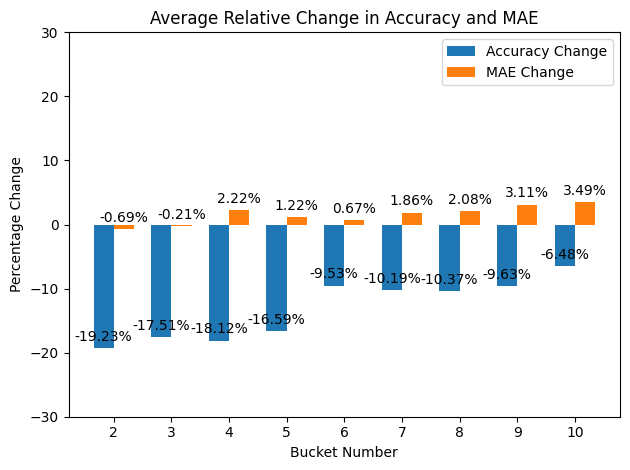

In [59]:
import json
import numpy as np
import matplotlib.pyplot as plt

def process_and_plot(json_paths, bucket_range):
    def read_json(file_path):
        with open(file_path, 'r') as file:
            return json.load(file)
    
    datasets = {path: read_json(path) for path in json_paths}

    # Compute median values for specified bucket range
    median_data = {}
    for dataset_path, dataset in datasets.items():
        dataset_name = dataset_path.split("/")[-1].split("_results")[0]
        median_data[dataset_name] = {}
        for bucket in bucket_range:
            bucket_key = f"{bucket}_buckets"
            if bucket_key in dataset:
                values = dataset[bucket_key]
                acc_values = [entry["Accuracy"] for entry in values]
                mae_values = [entry["MAE"] for entry in values]
                median_accuracy = np.median(acc_values)
                median_mae = np.median(mae_values)
                median_data[dataset_name][bucket_key] = {
                    "Median Accuracy": median_accuracy,
                    "Median MAE": median_mae
                }
    
    # Calculate relative changes to the previous bucket
    relative_changes = {}
    for dataset_name, buckets in median_data.items():
        relative_changes[dataset_name] = {}
        sorted_buckets = sorted(buckets.keys(), key=lambda x: int(x.split('_')[0]))
        previous_bucket_stats = None
        for bucket in sorted_buckets:
            current_stats = buckets[bucket]
            if previous_bucket_stats is not None:
                accuracy_change = ((current_stats['Median Accuracy'] - previous_bucket_stats['Median Accuracy']) / previous_bucket_stats['Median Accuracy']) * 100 if previous_bucket_stats['Median Accuracy'] != 0 else 0
                mae_change = ((current_stats['Median MAE'] - previous_bucket_stats['Median MAE']) / previous_bucket_stats['Median MAE']) * 100 if previous_bucket_stats['Median MAE'] != 0 else 0
                relative_changes[dataset_name][bucket] = {
                    "Relative Accuracy Change": accuracy_change,
                    "Relative MAE Change": mae_change
                }
            previous_bucket_stats = current_stats
    
    # Aggregate mean relative changes
    bucket_aggregates = {}
    for dataset_name, buckets in relative_changes.items():
        for bucket, changes in buckets.items():
            if bucket not in bucket_aggregates:
                bucket_aggregates[bucket] = {
                    "Total Accuracy Change": [],
                    "Total MAE Change": []
                }
            bucket_aggregates[bucket]["Total Accuracy Change"].append(changes["Relative Accuracy Change"])
            bucket_aggregates[bucket]["Total MAE Change"].append(changes["Relative MAE Change"])
    
    for bucket, totals in bucket_aggregates.items():
        mean_accuracy_change = np.mean(totals["Total Accuracy Change"])
        mean_mae_change = np.mean(totals["Total MAE Change"])
        bucket_aggregates[bucket]["Mean Accuracy Change"] = mean_accuracy_change
        bucket_aggregates[bucket]["Mean MAE Change"] = mean_mae_change
    
    # Plotting
    buckets = sorted(bucket_aggregates.keys(), key=lambda x: int(x.split('_')[0]))
    bucket_numbers = [b.split('_')[0] for b in buckets]
    mean_accuracy_changes = [bucket_aggregates[bucket]["Mean Accuracy Change"] for bucket in buckets]
    mean_mae_changes = [bucket_aggregates[bucket]["Mean MAE Change"] for bucket in buckets]
    x = list(range(len(buckets)))  # the label locations
    width = 0.35  # the width of the bars
    
    fig, ax = plt.subplots()
    rects1 = ax.bar([i - width/2 for i in x], mean_accuracy_changes, width, label='Accuracy Change')
    rects2 = ax.bar([i + width/2 for i in x], mean_mae_changes, width, label='MAE Change')
    ax.set_xlabel('Bucket Number')
    ax.set_ylabel('Percentage Change')
    ax.set_ylim(-30, 30)
    ax.set_title('Average Relative Change in Accuracy and MAE')
    ax.set_xticks(x)
    ax.set_xticklabels(bucket_numbers)
    ax.legend()

    # Function to add labels on the bars
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.2f}%',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
    
    autolabel(rects1)
    autolabel(rects2)
    
    fig.tight_layout()
    plt.show()

# Usage example
json_paths = [
    '/Users/eddavtyan/Downloads/ieregression_dsc/DSC_MLPRegressor_Concrete_results_15_buckets_50_iterations.json',
    '/Users/eddavtyan/Downloads/ieregression_dsc/DSC_MLPRegressor_Housing_results_15_buckets_50_iterations.json',
    '/Users/eddavtyan/Downloads/ieregression_dsc/DSC_MLPRegressor_Movies_results_15_buckets_50_iterations.json',
    '/Users/eddavtyan/Downloads/ieregression_dsc/DSC_RF_Concrete_results_10_buckets_5_iterations.json',
    '/Users/eddavtyan/Downloads/ieregression_dsc/DSC_RF_Housing_results_10_buckets_5_iterations.json',
    '/Users/eddavtyan/Downloads/ieregression_dsc/DSC_RF_Movies_results_10_buckets_5_iterations.json',
    '/Users/eddavtyan/Downloads/ieregression_dsc/DSC_XGBRegressor_Concrete_results_15_buckets_50_iterations.json',
    '/Users/eddavtyan/Downloads/ieregression_dsc/DSC_XGBRegressor_Housing_results_15_buckets_50_iterations.json',
    '/Users/eddavtyan/Downloads/ieregression_dsc/DSC_XGBRegressor_Movies_results_15_buckets_50_iterations.json'
]
process_and_plot(json_paths, bucket_range=range(1, 11))

In [5]:
import numpy as np
import json

file_path="/Users/eddavtyan/Downloads/ieregression_dsc/DSC_MLPRegressor_Concrete_results_15_buckets_50_iterations.json"
with open(file_path, 'r') as file:
    data = json.load(file)

# Function to calculate the median MAE for a given bucket
def calculate_median_MAE(bucket_data):
    mae_values = [entry['MAE'] for entry in bucket_data]
    return np.median(mae_values)

# Calculate the median MAE for each of the 15 buckets
median_maes = {key: calculate_median_MAE(data[key]) for key in data.keys()}

# Calculate the relative change in median MAE from bucket 1 to bucket 10
relative_change = ((median_maes['10_buckets'] - median_maes['1_buckets']) / median_maes['1_buckets']) * 100

median_maes, relative_change

({'1_buckets': 5.282768281337805,
  '2_buckets': 5.602790927015825,
  '3_buckets': 5.598895086353405,
  '4_buckets': 5.827310292901659,
  '5_buckets': 6.076680655532286,
  '6_buckets': 6.4712841791447495,
  '7_buckets': 6.806145473164973,
  '8_buckets': 7.328801775699947,
  '9_buckets': 8.216857495755429,
  '10_buckets': 10.634817838169397,
  '11_buckets': 9.127435235253223,
  '12_buckets': 10.403198768415916,
  '13_buckets': 8.744849734087524,
  '14_buckets': 9.89127204925261,
  '15_buckets': 9.678126186843752},
 101.31145777751662)

In [4]:
(8320788878434189-7993949001704819)/7993949001704819*100

4.088590966237924

In [7]:
(5.282768281337805-5.598895086353405)/5.598895086353405*100

-5.646235554334971

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import json

def plot_accuracy_r2_scores(json_file1, json_file2, dataset_name, regressor1_name, regressor2_name):
    # Load the JSON data
    with open(json_file1) as file1, open(json_file2) as file2:
        data1 = json.load(file1)
        data2 = json.load(file2)

    # Function to calculate average accuracy for each bucket
    def calculate_average_accuracy(data, buckets=10):
        average_accuracy = []
        for i in range(1, buckets+1):
            bucket_key = f"{i}_buckets"
            bucket_data = data.get(bucket_key, [])

            if bucket_data:
                accuracies = [entry["Accuracy"] for entry in bucket_data]
                avg_accuracy = np.mean(accuracies)
                average_accuracy.append(avg_accuracy)

        return average_accuracy

    # Function to calculate average R2 score for each bucket
    def calculate_average_r2(data, buckets=10):
        average_r2 = []
        for i in range(1, buckets+1):
            bucket_key = f"{i}_buckets"
            bucket_data = data.get(bucket_key, [])

            if bucket_data:
                r2_scores = [entry["R2"] for entry in bucket_data]
                avg_r2 = np.mean(r2_scores)
                average_r2.append(avg_r2)

        return average_r2

    # Compute average accuracy and R2 scores for each JSON file
    average_accuracy1 = calculate_average_accuracy(data1)
    average_accuracy2 = calculate_average_accuracy(data2)

    average_r2_1 = calculate_average_r2(data1)
    average_r2_2 = calculate_average_r2(data2)

    # Average the accuracies from the two JSON files
    combined_average_accuracy = [(a1 + a2) / 2 for a1, a2 in zip(average_accuracy1, average_accuracy2)]

    # Plot the average R2 scores and accuracy on the same plot
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), combined_average_accuracy, marker='o', color='black', label='Accuracy')
    plt.plot(range(1, 11), average_r2_1, marker='o', color='blue', label=f'R2 {regressor1_name}')
    plt.plot(range(1, 11), average_r2_2, marker='o', color='red', label=f'R2 {regressor2_name}')
    plt.title(f"'{dataset_name}' Average Accuracy, R2 Scores per Bucket")
    plt.xlabel('Bucket')
    plt.ylabel('Scores')
    plt.ylim(0, 1)
    plt.xticks(range(1, 11))
    plt.legend()
    plt.grid(True)
    plt.show()

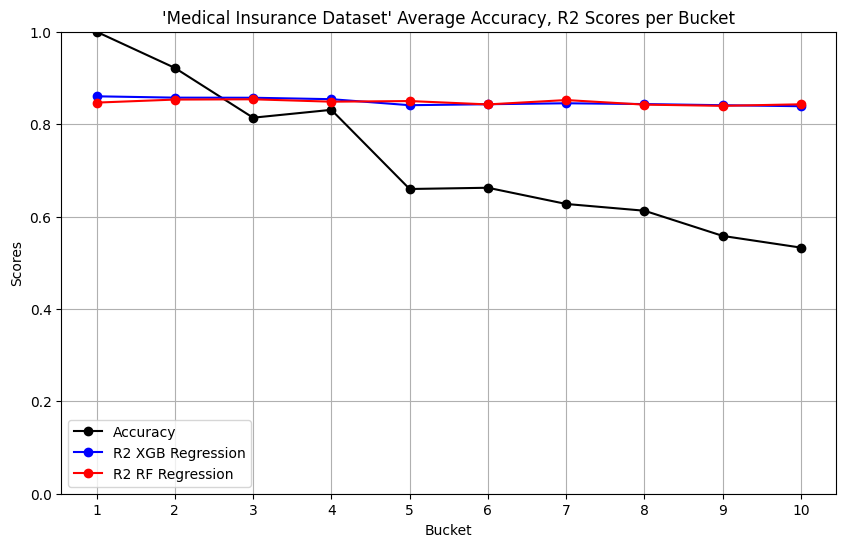

In [5]:
plot_accuracy_r2_scores('/Users/eddavtyan/Documents/XAI/Projects/EIRegression/examples/XGBRegression/results/insurance/results_15_buckets_50_iterations.json', 
                        '/Users/eddavtyan/Documents/XAI/Projects/EIRegression/examples/RFRegression/results/insurance/results_15_buckets_50_iterations.json', 
                        'Medical Insurance Dataset', 
                        'XGB Regression', 
                        'RF Regression')

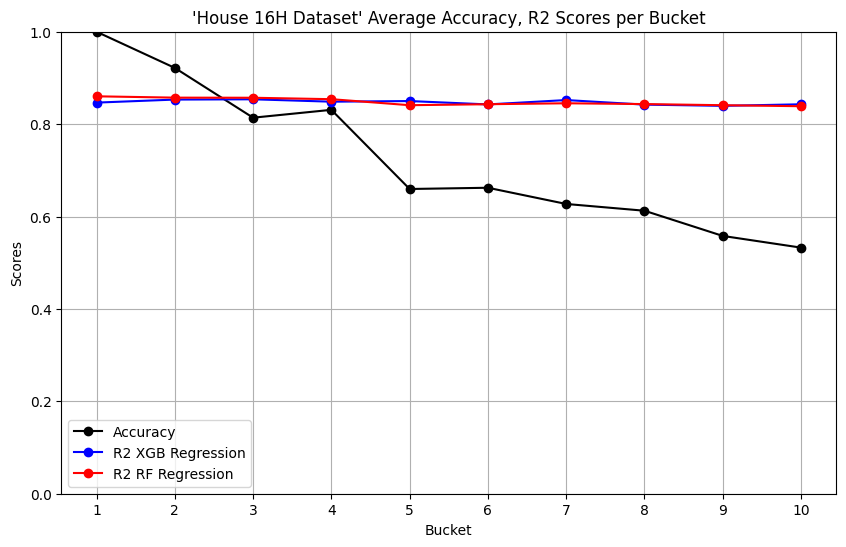

In [6]:
plot_accuracy_r2_scores('/Users/ed/Documents/XAI/Projects/EIRegression/examples/RFRegression/results/insurance_3_breaks/results_15_buckets_50_iterations.json', 
                        '/Users/ed/Documents/XAI/Projects/EIRegression/examples/XGBRegression/results/insurance_3_breaks/results_15_buckets_50_iterations.json', 
                        'House 16H Dataset', 
                        'XGB Regression', 
                        'RF Regression')